In [5]:
import pandas as pd

data = pd.read_csv("zoo.csv")


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


/home/tolu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: xlabel='class_type'>

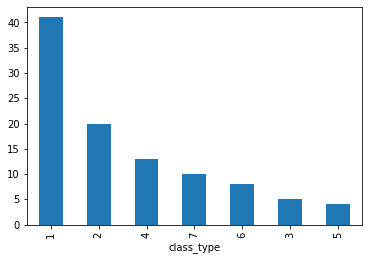

In [7]:
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax, kind='bar')

In [8]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
features = data.values[:,1:-1]
features.shape

(101, 16)

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7, linkage="average", compute_full_tree="auto")

In [16]:
model.fit(features)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [17]:
model.labels_

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 4, 4, 3, 1, 2, 2, 3, 3,
       1, 3, 4, 1, 1, 5, 1, 5, 4, 1, 5, 3, 2, 1, 1, 3, 2, 4, 4, 3, 4, 3,
       1, 1, 4, 1, 1, 1, 1, 4, 1, 0, 1, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 5, 2, 6, 3, 3, 2, 6, 2, 3, 5, 4, 2, 3,
       4, 1, 1, 1, 2, 5, 1, 3, 5, 4, 1, 6, 3])

In [18]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [19]:
labels = labels-1


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
score = mean_squared_error(labels, model.labels_)

In [23]:
abs_error = np.sqrt(score)
print(abs_error)

2.0990332522519517
